In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import imblearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
# Loading training dataset

df = pd.read_csv('/content/sample_data/Churn History Dataset.csv')

In [ ]:
# Loading test dataset

df_test = pd.read_csv('/content/sample_data/Churn Test Dataset.csv')

In [ ]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,197.4,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,195.5,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,121.2,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,61.9,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,148.3,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77.0,26.55,215.5,126,18.32,279.1,83.0,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57.0,39.29,153.4,55,13.04,191.3,123.0,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109.0,30.74,288.8,58,24.55,191.9,91.0,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105.0,36.35,159.6,84,13.57,139.2,137.0,6.26,5.0,10,1.35,2,True.


In [ ]:
df_test

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn Indicator
0,HI,101,510,354-8814,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7210,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9480,yes,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9103,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3646,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,FL,113,415,395-3867,no,no,0,244.7,97,55.13,187.5,70,13.46,215.1,90,9.68,13.6,6,3.67,1,True.
1668,NE,23,415,391-5977,no,no,0,155.6,122,30.07,170.2,82,15.94,50.9,130,2.29,10.6,5,2.86,1,True.
1669,WV,166,408,403-2223,no,yes,41,196.7,109,33.44,175.6,107,14.47,198.3,94,8.92,11.0,2,2.97,1,True.
1670,GA,69,408,420-7243,no,no,0,215.9,122,36.70,270.3,114,14.93,301.8,129,13.58,6.1,6,1.65,3,True.


# **1) Perform exploratory analysis and answer the following questions.**

## **a) Are there any outliers or extreme values that could skew your analysis? How do you want to deal with them?**

In [ ]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3332.000000,3332.000000,3331.000000,3333.000000,3332.000000,3333.000000,3331.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,190.740294,103.218788,101.768574,201.005734,100.343834,17.085633,201.808803,100.373762,16.062715,10.523132,4.488749,13.128689,1.572757
std,39.822106,42.371290,13.688365,598.879213,128.891770,4025.094680,50.709102,23.781417,4.309621,75.438537,24.880650,405.568376,12.241776,2.513638,598.319452,1.430420
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.600000,114.000000,36.825000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,34545.000000,7100.000000,232343.000000,363.700000,850.000000,30.910000,3434.340000,987.000000,23423.000000,600.600000,34.000000,34545.000000,34.000000


In [ ]:
df_test.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.00000
mean,98.604067,436.175239,6.998206,181.965909,99.306818,30.952931,199.743002,100.339713,16.977081,199.684270,99.493421,8.989599,10.327871,4.348086,2.786459,1.58134
std,39.391982,41.782656,13.197460,53.033715,19.227163,9.059653,50.270056,19.669882,4.270452,50.968262,20.726683,2.288694,2.706156,2.439135,0.728815,1.28494
min,1.000000,408.000000,0.000000,6.600000,34.000000,1.120000,22.300000,38.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,72.000000,408.000000,0.000000,144.100000,86.000000,24.495000,165.400000,88.000000,14.060000,166.675000,86.000000,7.500000,8.600000,3.000000,2.320000,1.00000
50%,98.000000,415.000000,0.000000,181.550000,99.000000,30.900000,200.000000,100.500000,17.000000,199.600000,99.000000,8.985000,10.400000,4.000000,2.810000,1.00000
75%,125.250000,415.000000,0.000000,216.725000,112.000000,36.860000,232.200000,113.000000,19.725000,233.225000,113.000000,10.502500,12.000000,5.000000,3.240000,2.00000
max,238.000000,510.000000,52.000000,351.500000,160.000000,59.760000,359.300000,169.000000,30.540000,381.600000,170.000000,17.170000,19.700000,19.000000,5.320000,7.00000


In [ ]:
temp_data = df.iloc[:,7:19]

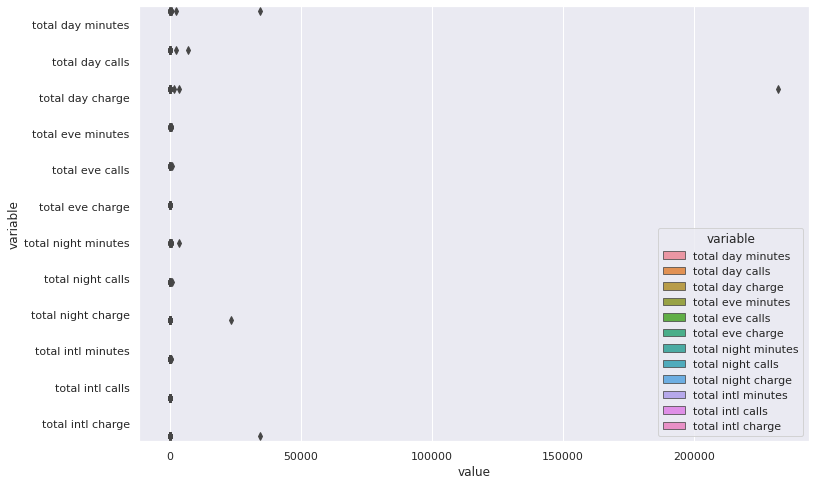

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(y = 'variable', x = 'value', data = pd.melt(temp_data), orient = "h", hue = 'variable')

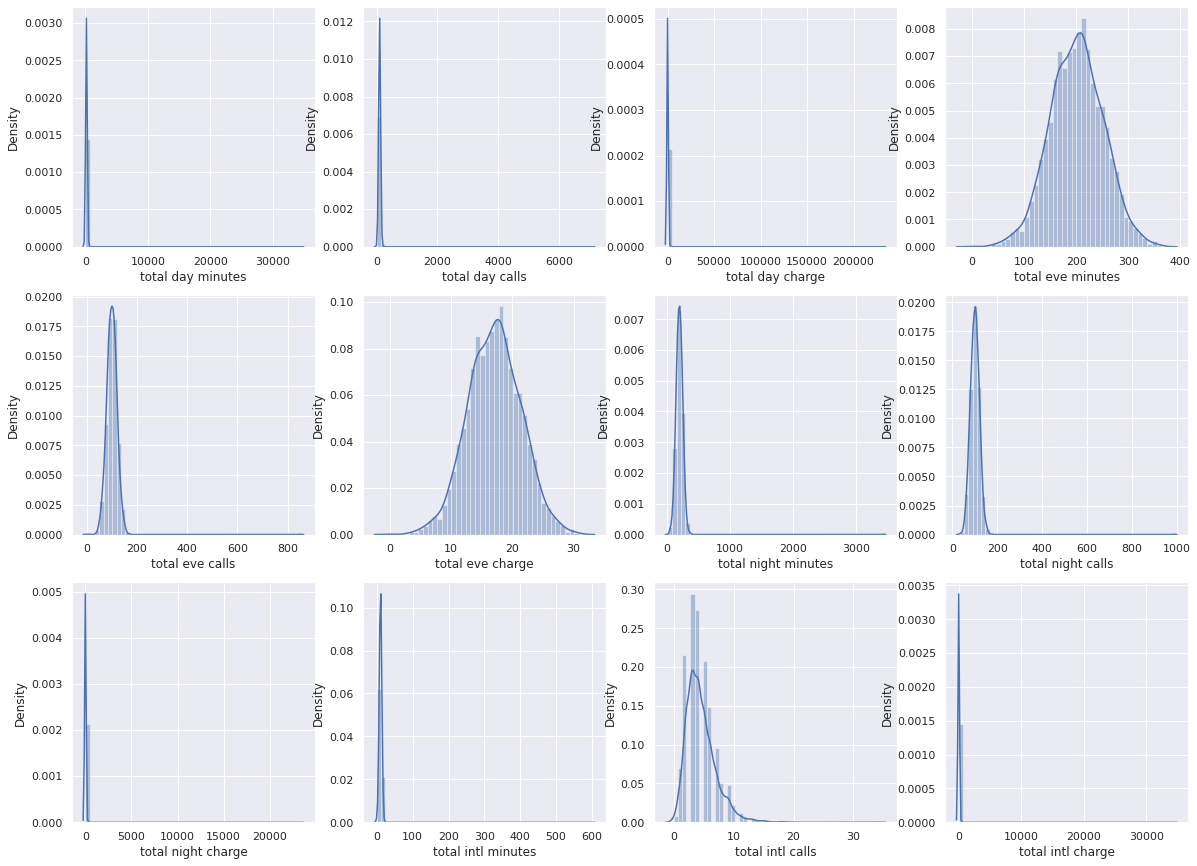

In [ ]:
plt.figure(figsize = ((20,15)))

for i, column in enumerate(temp_data.columns, 1):
    plt.subplot(3,4,i)
    sns.distplot(temp_data[column])

**Clearly there are some serious outliers in some of the columns and also data are skewed. So we need to handle this.**

In [ ]:
temp_test_data = df_test.iloc[:,7:19]

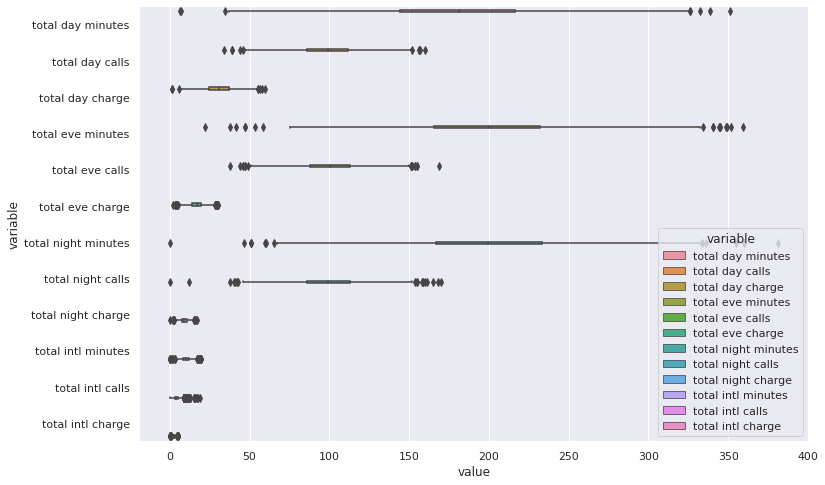

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(y = 'variable', x = 'value', data = pd.melt(temp_test_data), orient = "h", hue = 'variable')

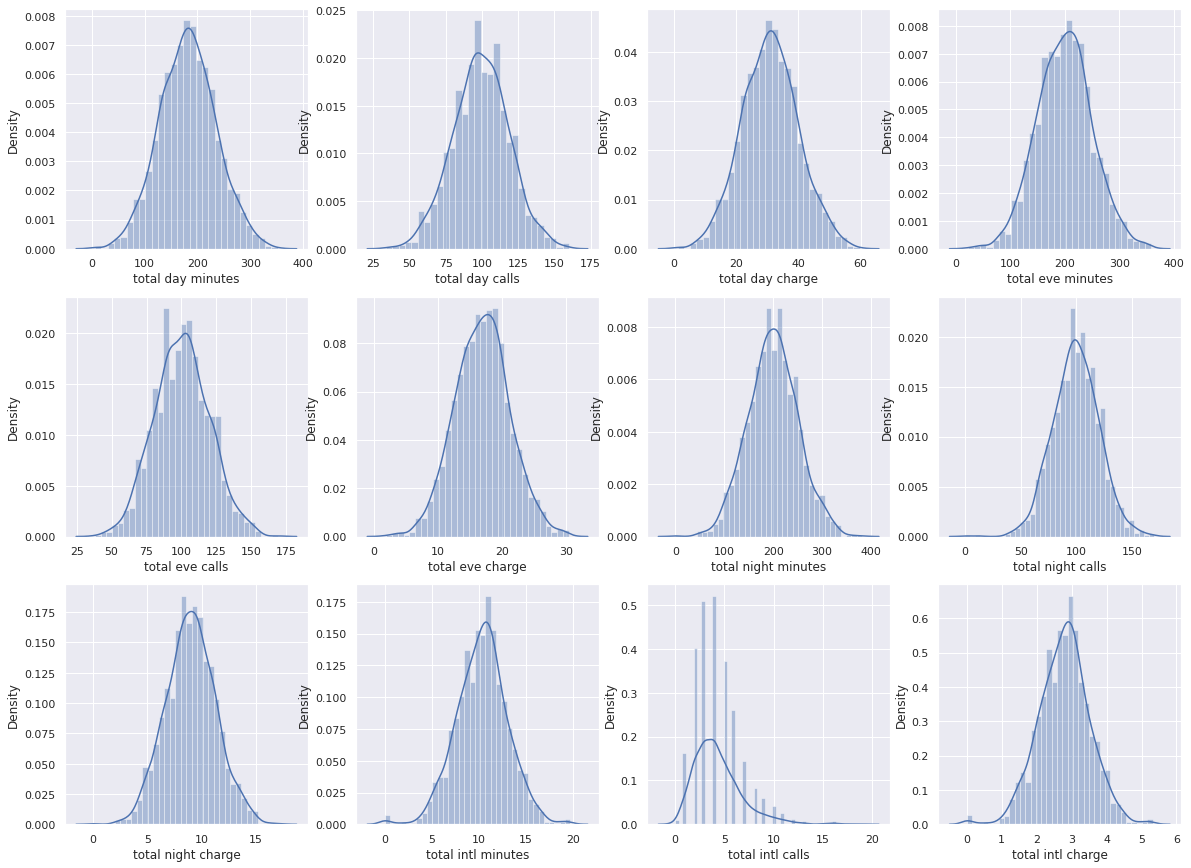

In [ ]:
plt.figure(figsize = ((20,15)))

for i, column in enumerate(temp_test_data.columns, 1):
    plt.subplot(3,4,i)
    sns.distplot(temp_test_data[column])

**Test dataset doesn't have that much outliers. It seems fine**

### **We can simply remove the outliers from the training dataset. Let's do outlier treatment after Null value analysis.**

## **b) Perform the required null value analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account length                 3333 non-null   int64  
 2   area code                      3333 non-null   int64  
 3   phone number                   3333 non-null   object 
 4   international plan             3333 non-null   object 
 5   voice mail plan                3333 non-null   object 
 6   number vmail messages          3333 non-null   int64  
 7   total day minutes              3333 non-null   float64
 8   total day calls                3332 non-null   float64
 9   total day charge               3332 non-null   float64
 10  total eve minutes              3331 non-null   float64
 11  total eve calls                3333 non-null   int64  
 12  total eve charge               3332 non-null   f

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          1672 non-null   object 
 1   account length                 1672 non-null   int64  
 2   area code                      1672 non-null   int64  
 3   phone number                   1672 non-null   object 
 4   international plan             1672 non-null   object 
 5   voice mail plan                1672 non-null   object 
 6   number vmail messages          1672 non-null   int64  
 7   total day minutes              1672 non-null   float64
 8   total day calls                1672 non-null   int64  
 9   total day charge               1672 non-null   float64
 10  total eve minutes              1672 non-null   float64
 11  total eve calls                1672 non-null   int64  
 12  total eve charge               1672 non-null   f

* **Train dataset contains very few null values. So simply we can drop them.**
* **Test dataset contains no null values. So that's great.**

In [ ]:
# Removing null values

df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Y_var                            0
dtype: int64

### **Outlier Detection and Treatment**

In [ ]:
# Selecting numerical variables

df_num = df.select_dtypes(include =[np.number])

In [ ]:
# Applying LocalOutlierFactor for outlier analysis

from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()
outlier_factor=lof.fit_predict(df_num)

In [ ]:
# Outliers are those whose outlier_factor value == -1

outlier= outlier_factor==-1

In [ ]:
# Outlier values

df_num[outlier]

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
3,84,408,0,299.4,7100.0,1500.90,61.9,88,5.26,196.90,89.0,8.86,600.6,7,1.78,2
15,161,415,0,332.9,67.0,56.59,317.8,97,27.01,160.60,128.0,7.23,5.4,9,1.46,4
32,172,408,0,212.0,121.0,36.04,31.2,115,2.65,293.30,78.0,13.20,12.6,10,3.40,3
84,106,510,0,2323.5,96.0,3523.32,249.2,850,21.18,191.40,88.0,8.61,12.4,1,3.35,2
197,208,510,0,326.5,67.0,55.51,176.3,113,14.99,181.70,102.0,8.18,10.7,6,2.89,2
289,89,510,0,303.9,95.0,51.66,260.9,114,22.18,3434.34,987.0,23423.00,364.0,34,34545.00,34
315,39,408,0,60.4,158.0,10.27,306.2,120,26.03,123.90,46.0,5.58,12.4,3,3.35,1
395,98,415,22,278.3,89.0,47.31,93.4,143,7.94,107.60,42.0,4.84,9.7,5,2.62,0
817,243,510,0,95.5,92.0,16.24,163.7,63,13.91,264.20,118.0,11.89,6.6,6,1.78,2
850,166,408,0,274.3,110.0,46.63,52.9,109,4.50,246.10,119.0,11.07,10.9,5,2.94,0


In [ ]:
# Let's extract the index of these outliers and remove them from training dataset

df=df.drop(index=list(df_num[outlier].index))
df.shape

(3307, 21)

**We have handled outliers successfully as well as null values too.**

## **c) Is there an impact of total day minutes on churn?**

**We can check impact of total day minutes on churn by plotting scatterplot and also verify that using ANOVA test.**

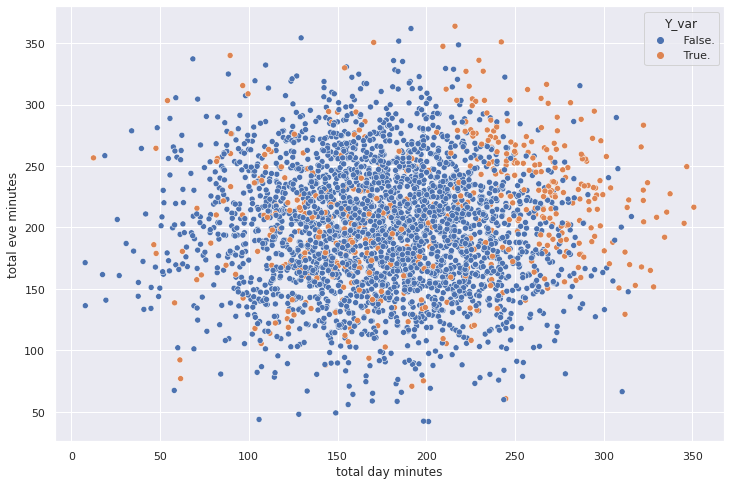

In [ ]:
sns.scatterplot(df['total day minutes'], df['total eve minutes'], data = df, hue = df['Y_var'])

Above plot shows that customers that have both high day minutes and high evening minutes churn at far greater rates.

In [ ]:
# ANOVA test between total day minutes and target variable

from scipy.stats import f_oneway
AnovaResults = f_oneway(*df.groupby('Y_var')['total day minutes'].apply(list))
print('ANOVA test between Y_var and total day minutes')
print('P-Value for Anova is: ', AnovaResults[1])

ANOVA test between Y_var and total day minutes
P-Value for Anova is:  3.734309579018676e-32


**Since p-value is less than 0.05. Therefore total day minutes have impact on churn.**

## **d) Is there an impact of international plan on churn?**

**Let's check this with the help of Chi Square test.**

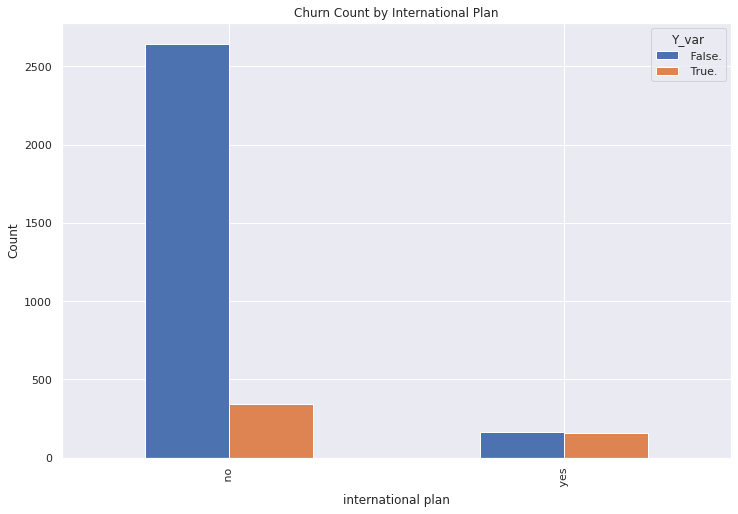

In [ ]:
pd.crosstab(df['international plan'], df['Y_var']).plot(kind = 'bar', legend = True)
plt.ylabel('Count')
plt.title('Churn Count by International Plan')
plt.show()

The above plot suggests that there is high rate of churn in customers those have international calling plan.

In [ ]:
CrosstabResult=pd.crosstab(index=df['international plan'],columns=df['Y_var'])
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 7.819573331087636e-71


**Since p-value is less than 0.05. Therefore international plan have impact on churn.**

## **d) Explore the impact of other features and perform feature engineering if needed and present your findings.**

### **EDA on features**

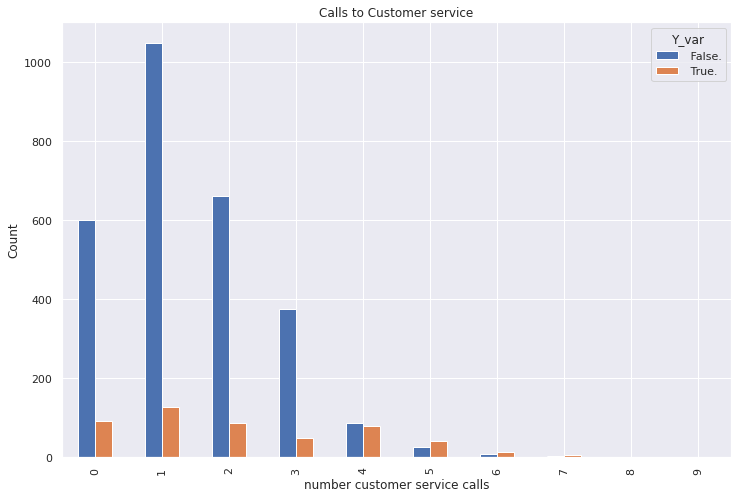

In [ ]:
# Exploring Number customer service calls feature

pd.crosstab(df['number customer service calls'], df['Y_var']).plot(kind = 'bar', legend = True)
plt.ylabel('Count')
plt.title('Calls to Customer service')
plt.show()

Once a customer gets up to 4 customer service calls, the churn rate drastically increases.

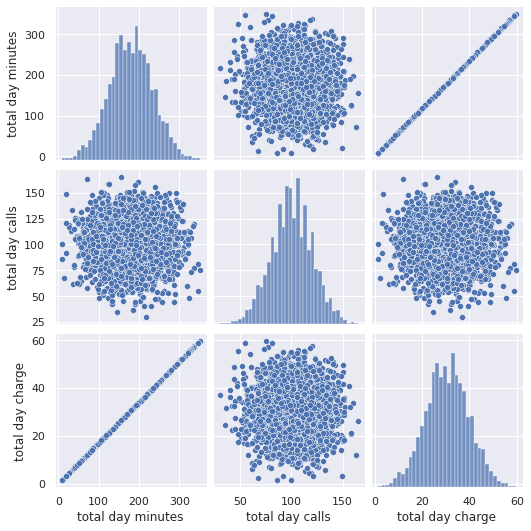

<Figure size 720x576 with 0 Axes>

In [ ]:
sns.pairplot(data = df, vars = ['total day minutes', 'total day calls', 'total day charge'])
plt.figure(figsize=((10,8)))
plt.show()

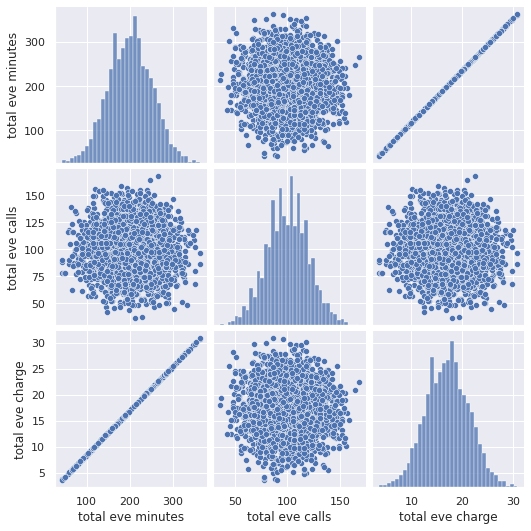

<Figure size 720x576 with 0 Axes>

In [ ]:
sns.pairplot(data = df, vars = ['total eve minutes', 'total eve calls', 'total eve charge'])
plt.figure(figsize=((10,8)))
plt.show()

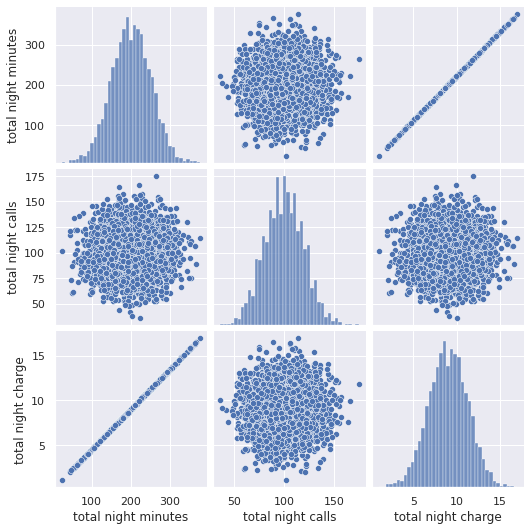

<Figure size 720x576 with 0 Axes>

In [ ]:
sns.pairplot(data = df, vars = ['total night minutes', 'total night calls', 'total night charge'])
plt.figure(figsize=((10,8)))
plt.show()

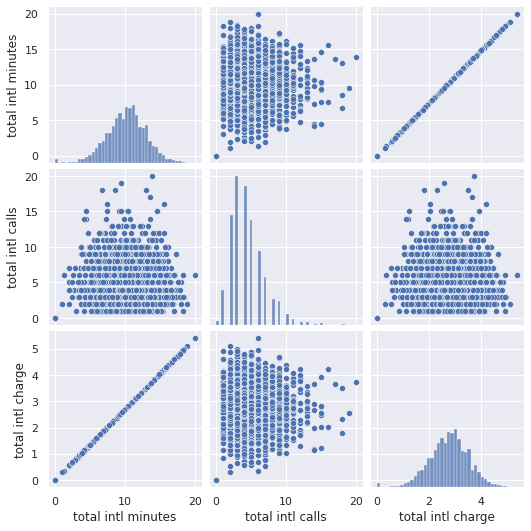

<Figure size 720x576 with 0 Axes>

In [ ]:
sns.pairplot(data = df, vars = ['total intl minutes', 'total intl calls', 'total intl charge'])
plt.figure(figsize=((10,8)))
plt.show()

**1. Total day charge and total day minutes are highly correlated.**
**2. Total eve charge and total eve minutes are highly correlated.**
**3. Total night charge and total night minutes are highly correlated.**
**4. Total intl charge and total intl minutes are highly correlated.**

### **Clearly there are some correlation between independent columns. But let's first check impacts of independent features on Churn variable.**

**Let's do ANOVE test for numerical columns and Chi Square test for categorical columns.**

In [ ]:
from scipy.stats import f_oneway
for i in df.select_dtypes(include=[np.number]).columns:
  CategoryGroupLists = df.groupby('Y_var')[i].apply(list)
  AnovaResults = f_oneway(*CategoryGroupLists)
  print('ANOVA test between Y_var and {}'.format(i))
  print('P-Value for Anova is: ', AnovaResults[1])
  print("   ")

ANOVA test between Y_var and account length
P-Value for Anova is:  0.2150431191810921
   
ANOVA test between Y_var and area code
P-Value for Anova is:  0.5364443462229278
   
ANOVA test between Y_var and number vmail messages
P-Value for Anova is:  5.660434684437578e-07
   
ANOVA test between Y_var and total day minutes
P-Value for Anova is:  3.734309579018676e-32
   
ANOVA test between Y_var and total day calls
P-Value for Anova is:  0.11349732677829322
   
ANOVA test between Y_var and total day charge
P-Value for Anova is:  3.7311532800147295e-32
   
ANOVA test between Y_var and total eve minutes
P-Value for Anova is:  3.4238652450055235e-07
   
ANOVA test between Y_var and total eve calls
P-Value for Anova is:  0.7248626302864761
   
ANOVA test between Y_var and total eve charge
P-Value for Anova is:  3.4365986692573124e-07
   
ANOVA test between Y_var and total night minutes
P-Value for Anova is:  0.06353547008936936
   
ANOVA test between Y_var and total night calls
P-Value for An

Columns like, number vmail mesaages, total day minutes, total day charge, total eve minutes, total eve charge, total intl minutes, total intl calls have significant impacts on Churn.

In [ ]:
from scipy.stats import chi2_contingency
for i in df.select_dtypes(exclude=[np.number]).columns:
  if i != 'Y_var':
    Categories_yvar=pd.crosstab(index=df[i],columns=df['Y_var'])
    Chi_Sq_Result = chi2_contingency(Categories_yvar)
    print('ChiSq test between Y_var and {}'.format(i))
    print('P-Value for ChiSq is: ', Chi_Sq_Result[1])
    print("   ")

ChiSq test between Y_var and state
P-Value for ChiSq is:  0.01084016816513944
   
ChiSq test between Y_var and phone number
P-Value for ChiSq is:  0.4918241320055631
   
ChiSq test between Y_var and international plan
P-Value for ChiSq is:  7.819573331087636e-71
   
ChiSq test between Y_var and voice mail plan
P-Value for ChiSq is:  1.4103338701045658e-08
   


Columns like, state, international plan, voice mail plan have significant impacts on Churn.

### **Feature Engineering**

**Let's first make same name of target variable in both the datasets.**

In [ ]:
df.rename(columns={'Y_var':'Churn Flag'},inplace=True)
df_test.rename(columns={'Churn Indicator':'Churn Flag'},inplace=True)

**Now drop those features whose p-values more than 0.05 from both the datasets.**

In [ ]:
columns = ['state','phone number', 'total night charge', 'total night calls', 'total night minutes', 'total eve calls', 'total day calls', 'area code', 'account length']
df.drop(columns, inplace=True, axis=1)
df_test.drop(columns, inplace = True, axis=1)

In [ ]:
df_test.describe()

,number vmail messages,total day minutes,total day charge,total eve minutes,total eve charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.00000
mean,6.998206,181.965909,30.952931,199.743002,16.977081,10.327871,4.348086,2.786459,1.58134
std,13.197460,53.033715,9.059653,50.270056,4.270452,2.706156,2.439135,0.728815,1.28494
min,0.000000,6.600000,1.120000,22.300000,1.900000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,144.100000,24.495000,165.400000,14.060000,8.600000,3.000000,2.320000,1.00000
50%,0.000000,181.550000,30.900000,200.000000,17.000000,10.400000,4.000000,2.810000,1.00000
75%,0.000000,216.725000,36.860000,232.200000,19.725000,12.000000,5.000000,3.240000,2.00000
max,52.000000,351.500000,59.760000,359.300000,30.540000,19.700000,19.000000,5.320000,7.00000


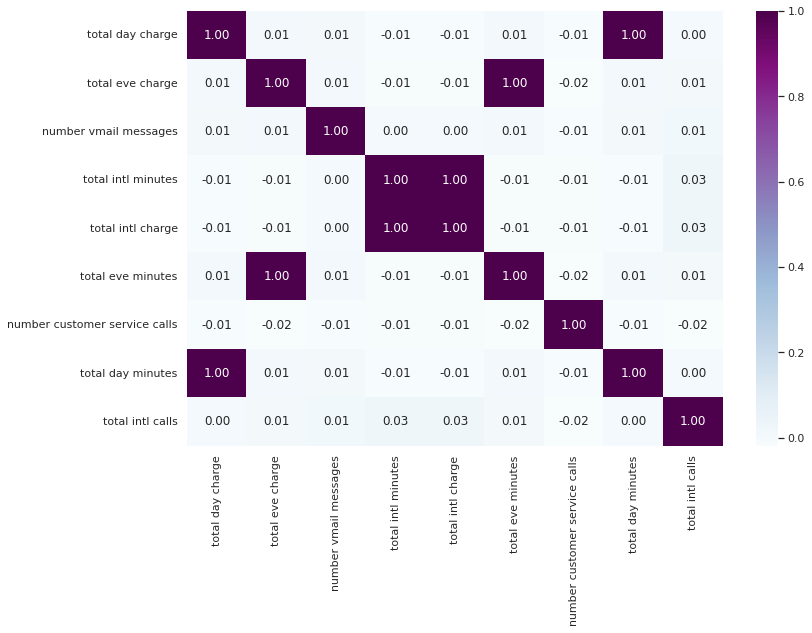

In [ ]:
# Checking correlation between independent features.

numerical = list(set(df.columns)-set(['international plan', 'voice mail plan']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix, annot = True, cmap='BuPu', fmt=".2f")

**Let's drop highly correlated features.**

In [ ]:
df.drop(['total day charge', 'total intl charge', 'total eve charge'], inplace=True, axis=1)
df_test.drop(['total day charge', 'total intl charge', 'total eve charge'], inplace = True, axis=1)

### **Encoding categorical variables.**

In [ ]:
# Encoding target variable

encode_var= {'Churn Flag':{' True.':1,' False.':0,}}

# replacing the previous target variable with new encoded variable

df = df.replace(encode_var)
df_test = df_test.replace(encode_var)

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["international plan"]=le.fit_transform(df["international plan"])
df_test["international plan"]=le.transform(df_test["international plan"])

df["voice mail plan"]=le.fit_transform(df["voice mail plan"])
df_test["voice mail plan"]=le.transform(df_test["voice mail plan"])

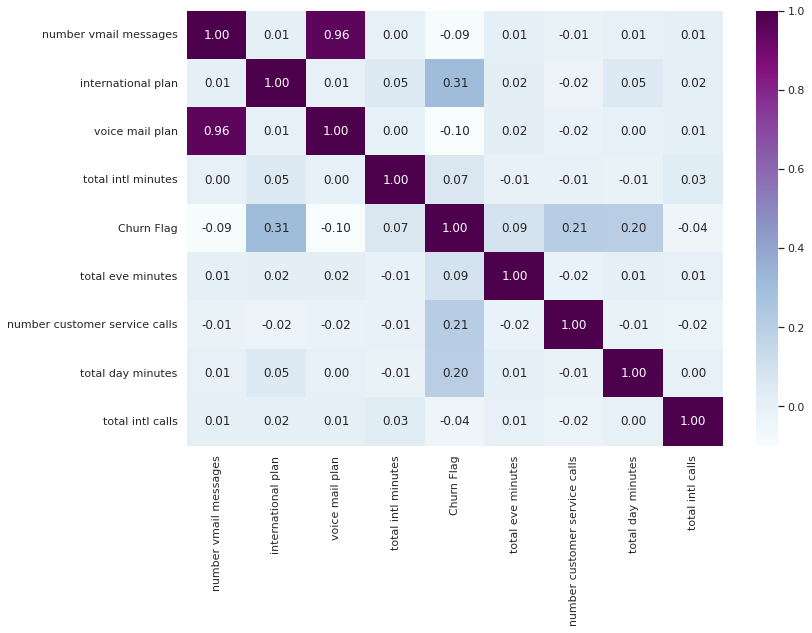

In [ ]:
# Checking correlation between independent features.

numerical = list(set(df.columns))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix, annot = True, cmap='BuPu', fmt=".2f")

**There is a high correlation between voice mail plan and number vmail messages. So we can drop number vmail messages from both datasets.**

# **2) Build a logistic regression model with appropriate features and answer the following questions.**

In [ ]:
df.drop(['number vmail messages'], inplace=True, axis=1)
df_test.drop(['number vmail messages'], inplace = True, axis=1)

In [ ]:
X = df.drop('Churn Flag', axis = 1)
y = df['Churn Flag']

In [ ]:
import statsmodels.api as sm
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.376259
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Churn Flag   No. Observations:                 3307
Model:                          Logit   Df Residuals:                     3300
Method:                           MLE   Df Model:                            6
Date:                Wed, 21 Sep 2022   Pseudo R-squ.:                  0.1109
Time:                        06:38:11   Log-Likelihood:                -1244.3
converged:                       True   LL-Null:                       -1399.5
Covariance Type:            nonrobust   LLR p-value:                 4.561e-64
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
international plan                2.1929      0.138     15.909      0.

In [ ]:
X_test = df_test.drop('Churn Flag', axis = 1)
y_test = df_test['Churn Flag']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 42)

As we have highly imbalanced dataset. So we will apply SMOTE + ENN to make the classes of dependent variable equal in number.

In [ ]:
from imblearn.combine import SMOTEENN
smenn = SMOTEENN()
X_smenn, y_smenn = smenn.fit_resample(X_train, y_train)

### **Training Logistic Regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_smenn, y_smenn)

LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### **Evaluating Train set performance.**

In [ ]:
y_smenn_pred = classifier.predict(X_smenn)

In [ ]:
print(confusion_matrix(y_smenn, y_smenn_pred))
print(classification_report(y_smenn, y_smenn_pred))

[[ 927  502]
 [ 274 1731]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70      1429
           1       0.78      0.86      0.82      2005

    accuracy                           0.77      3434
   macro avg       0.77      0.76      0.76      3434
weighted avg       0.77      0.77      0.77      3434



## **b) What are the leading indicators of customer churn? Could you rank them in the order of importance?**

In [ ]:
importance = classifier.coef_[0]
feature_importance = dict(zip(list(X.columns),list(importance)))
feature_importance

{'international plan': 2.7015811647126626,
 'voice mail plan': -1.4913053028705936,
 'total day minutes': 0.014680615270008376,
 'total eve minutes': 0.004657798003648325,
 'total intl minutes': 0.08986477190408476,
 'total intl calls': -0.19840961771002652,
 'number customer service calls': 0.46719416668885794}

**Following is the ranking of important features, top is most important and bottom is least important:**
* **International plan**
* **Number customer service calls**
* **Total intl minutes**
* **Total day minutes**
* **Total eve minutes**
* **Total intl calls**
* **Voice mail plan**

### **Evaluating validation set performance.**

In [ ]:
y_val_pred = classifier.predict(X_val)

In [ ]:
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

[[190  91]
 [ 15  35]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.78       281
           1       0.28      0.70      0.40        50

    accuracy                           0.68       331
   macro avg       0.60      0.69      0.59       331
weighted avg       0.83      0.68      0.72       331



### **Evaluating Test data performance.**

In [ ]:
y_pred = classifier.predict(X_test)

## **a) Capture the model performance on the test dataset? What metrics and visualizations would you use to present your findings to the client?**

**We will use Recall as a metrics because we want our model to minimize the error of False Negative, which means a customer has churned but model predicts as a non-churned.**

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[859 573]
 [ 38 202]]
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      1432
           1       0.26      0.84      0.40       240

    accuracy                           0.63      1672
   macro avg       0.61      0.72      0.57      1672
weighted avg       0.86      0.63      0.69      1672



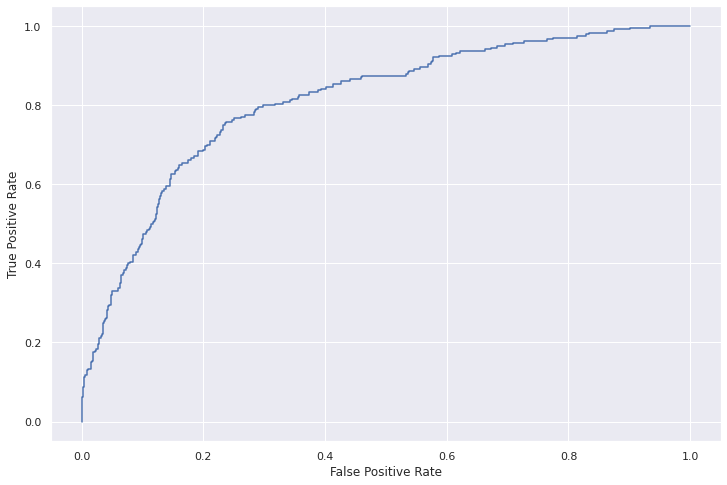

In [ ]:
from sklearn import metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **c) How would you flag each customer in the test dataset as HIGH or LOW churn risk based on their predicted churn probability?**

In [ ]:
probability=classifier.predict_proba(df_test.iloc[:,:-1])
proba=pd.DataFrame(probability)

In [ ]:
df_test["probability_0"]=proba[0]
df_test["probability_1"]=proba[1]
df_test.head()

,international plan,voice mail plan,total day minutes,total eve minutes,total intl minutes,total intl calls,number customer service calls,Churn Flag,probability_0,probability_1
0,0,0,70.9,211.9,10.6,3,3,0,0.634437,0.365563
1,0,0,223.6,244.8,9.5,7,0,0,0.610735,0.389265
2,1,1,294.7,237.3,13.7,6,1,0,0.056692,0.943308
3,0,0,216.8,126.4,15.7,2,1,0,0.286041,0.713959
4,0,0,197.4,124.0,7.7,4,2,0,0.507458,0.492542


In [ ]:
# If probability of churn 0 greater than 0.5 then HIGH otherwise LOW.

df_test["label_churn"]="LOW"

df_test["label_churn"][df_test["probability_1"]>0.5]="HIGH"

df_test.tail(10)

,international plan,voice mail plan,total day minutes,total eve minutes,total intl minutes,total intl calls,number customer service calls,Churn Flag,probability_0,probability_1,label_churn
1662,1,0,312.4,170.2,15.0,4,3,1,0.003340,0.996660,HIGH
1663,0,0,177.2,175.6,10.4,5,1,1,0.624574,0.375426,LOW
1664,1,0,244.7,141.6,12.8,7,1,1,0.054992,0.945008,HIGH
1665,1,1,252.6,172.1,15.1,2,3,1,0.023116,0.976884,HIGH
1666,0,0,184.2,158.4,16.8,2,0,1,0.446009,0.553991,HIGH
1667,0,0,244.7,187.5,13.6,6,1,1,0.348301,0.651699,HIGH
1668,0,0,155.6,170.2,10.6,5,1,1,0.697050,0.302950,LOW
1669,0,1,196.7,175.6,11.0,2,1,1,0.743625,0.256375,LOW
1670,0,0,215.9,270.3,6.1,6,3,1,0.299478,0.700522,HIGH
1671,0,0,326.1,161.0,11.0,5,2,1,0.106211,0.893789,HIGH
